El quiere que yo haga la visualización solamente, entonces me cojo la AlexNet, le paso el perro y miro a ver si me dice que es un perro con un 99% de probabilidades.

In [1]:
import torch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory
import requests



In [5]:
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    
])

image_path = 'C:/Users/paula/Documents/Repositorio/images/perroAlvaro.jpeg'
image = Image.open(image_path)
image_tensor = transform(image).unsqueeze(0)

In [6]:
model = torch.hub.load('pytorch/vision:v0.17.1', 'resnet152', pretrained=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.eval()

Using cache found in C:\Users\paula/.cache\torch\hub\pytorch_vision_v0.17.1


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [7]:
url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
response = requests.get(url)

with open("imagenet_classes.txt", "w") as f:
    f.write(response.text)

class_names = []
with open("imagenet_classes.txt", "r") as f:
    class_names = [line.strip() for line in f.readlines()]

In [8]:
def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

In [9]:
def visualize_model(model, image_tensor, class_names):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        inputs = image_tensor.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        probs = torch.nn.functional.softmax(outputs, dim=1)[0]  # Obtener las probabilidades de las clases

        predicted_class = class_names[preds.item()]
        confidence = probs[preds.item()].item()  # Obtener la probabilidad de la clase predicha

        fig, ax = plt.subplots()
        ax.axis('off')
        ax.set_title(f'Predicted: {predicted_class} | Probability: {confidence:.2f}')
        imshow(inputs.cpu().squeeze(0))
    
    model.train(mode=was_training)
    




# Ejecutar la visualización


<Figure size 640x480 with 0 Axes>

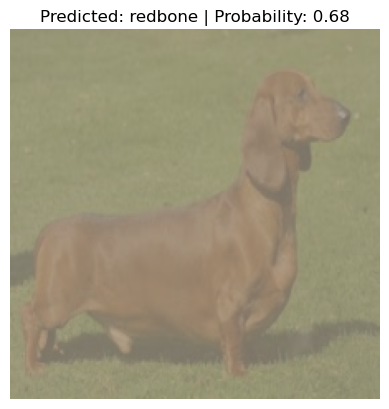

In [10]:
visualize_model(model, image_tensor, class_names)